In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
x_values = np.linspace(-1, 1, 100)
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_train = x_train**2 + random.uniform(-20, 20)

In [3]:
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        out = self.hidden2(x)
        return out

In [7]:
x_train

array([[-1.        ],
       [-0.97979796],
       [-0.95959598],
       [-0.93939394],
       [-0.9191919 ],
       [-0.89898992],
       [-0.87878788],
       [-0.85858583],
       [-0.83838385],
       [-0.81818181],
       [-0.79797977],
       [-0.77777779],
       [-0.75757575],
       [-0.73737371],
       [-0.71717173],
       [-0.69696969],
       [-0.67676765],
       [-0.65656567],
       [-0.63636363],
       [-0.61616164],
       [-0.5959596 ],
       [-0.57575756],
       [-0.55555558],
       [-0.53535354],
       [-0.5151515 ],
       [-0.49494949],
       [-0.47474748],
       [-0.45454547],
       [-0.43434343],
       [-0.41414142],
       [-0.39393941],
       [-0.37373737],
       [-0.35353535],
       [-0.33333334],
       [-0.3131313 ],
       [-0.29292929],
       [-0.27272728],
       [-0.25252524],
       [-0.23232323],
       [-0.21212122],
       [-0.19191919],
       [-0.17171717],
       [-0.15151516],
       [-0.13131313],
       [-0.11111111],
       [-0

In [8]:
y_train

array([[ 11.57939625],
       [ 11.5394001 ],
       [ 11.5002203 ],
       [ 11.46185684],
       [ 11.42430973],
       [ 11.38757896],
       [ 11.35166454],
       [ 11.31656551],
       [ 11.28228378],
       [ 11.24881744],
       [ 11.2161684 ],
       [ 11.18433475],
       [ 11.15331745],
       [ 11.12311649],
       [ 11.09373188],
       [ 11.06516266],
       [ 11.03741074],
       [ 11.01047516],
       [ 10.98435497],
       [ 10.95905113],
       [ 10.93456364],
       [ 10.91089344],
       [ 10.88803864],
       [ 10.86599922],
       [ 10.84477711],
       [ 10.82437134],
       [ 10.80478096],
       [ 10.78600788],
       [ 10.76805019],
       [ 10.75090981],
       [ 10.73458481],
       [ 10.71907616],
       [ 10.70438385],
       [ 10.69050694],
       [ 10.67744732],
       [ 10.66520405],
       [ 10.65377617],
       [ 10.64316559],
       [ 10.6333704 ],
       [ 10.62439156],
       [ 10.61622906],
       [ 10.6088829 ],
       [ 10.6023531 ],
       [ 10

In [4]:
model = LR()
loss_func = nn.MSELoss()
learning_rate = 0.03
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

plt.ion()

epoch 5, loss 0.60436726
epoch 10, loss 0.14665790
epoch 15, loss 0.09915893
epoch 20, loss 0.09344053
epoch 25, loss 0.09221393
epoch 30, loss 0.09148445
epoch 35, loss 0.09080999
epoch 40, loss 0.09014330
epoch 45, loss 0.08947914
epoch 50, loss 0.08882819
epoch 55, loss 0.08817607
epoch 60, loss 0.08752172
epoch 65, loss 0.08686447
epoch 70, loss 0.08620670
epoch 75, loss 0.08555263
epoch 80, loss 0.08489282
epoch 85, loss 0.08422637
epoch 90, loss 0.08355286
epoch 95, loss 0.08287468
epoch 100, loss 0.08219732
epoch 105, loss 0.08151294
epoch 110, loss 0.08081923
epoch 115, loss 0.08011577
epoch 120, loss 0.07940206
epoch 125, loss 0.07868284
epoch 130, loss 0.07795458
epoch 135, loss 0.07722377
epoch 140, loss 0.07648193
epoch 145, loss 0.07572874
epoch 150, loss 0.07496823
epoch 155, loss 0.07420094
epoch 160, loss 0.07342270
epoch 165, loss 0.07263335
epoch 170, loss 0.07183292
epoch 175, loss 0.07102878
epoch 180, loss 0.07022364
epoch 185, loss 0.06940825
epoch 190, loss 0.068

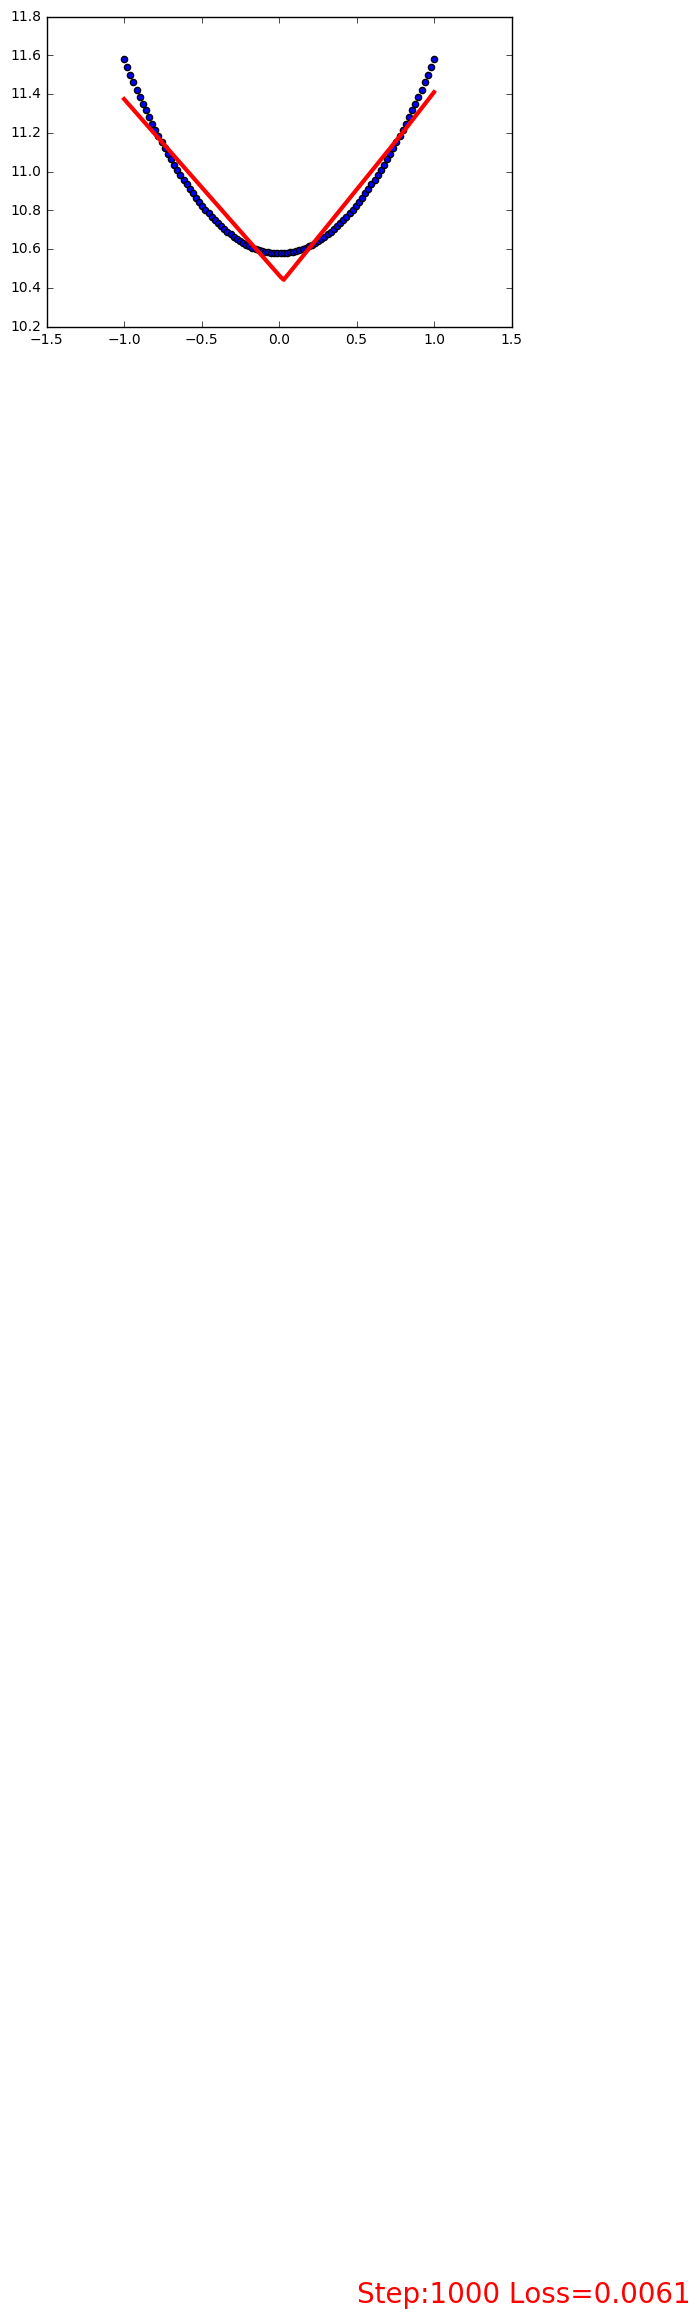

In [5]:
epochs = 1000
for epoch in range(epochs):
    epoch += 1

    # convert to variables
    x = Variable(torch.from_numpy(x_train))
    y = Variable(torch.from_numpy(y_train))

    # clear gradient w.r.t. parameters 
    optimizer.zero_grad()

    # forward to get output
    prediction = model(x)

    # calculate loss
    loss = loss_func(prediction, y)

    # backward to get gradient
    loss.backward()

    # update parameters
    optimizer.step() 

    if epoch % 5 == 0:
    # plot and show learning process
        print("epoch %d, loss %.8f" % (epoch, loss.data[0]))
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=3)
        plt.text(0.5, 0, 'Step:%d Loss=%.4f' % (epoch, loss.data[0]), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

In [6]:
# save the model
save_model = False
if save_model == True:
    torch.save(model.state_dict(), "nonlinear_model.pkl")

# load the model
load_model = False
if load_model is True:
    model.load_state_dict(torch.load("nonlinear_model.pkl"))